<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>




<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

Alireza Heidari


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [4]:
import nltk
from nltk import word_tokenize
import string

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_fscore_support,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.feature_extraction.text import CountVectorizer


import torch
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)

from tqdm import tqdm

In [5]:
def extract_label_from_labels(labels):
    splitted = labels.split()
    return splitted[0].replace("'", "").replace('[', '').replace(']', '').replace(',', '')

In [6]:
df = pd.read_csv('./arxiv_data.csv')
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [7]:
df = df.drop_duplicates(subset=['summaries', 'titles'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38985 entries, 0 to 51772
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     38985 non-null  object
 1   summaries  38985 non-null  object
 2   terms      38985 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [9]:
df.isnull().sum()

titles       0
summaries    0
terms        0
dtype: int64

In [10]:
df.describe()

,titles,summaries,terms
count,38985,38985,38985
unique,38972,38979,3157
top,Fast Convergence of DETR with Spatially Modula...,Graph-based methods are known to be successful...,['cs.CV']
freq,2,2,12751


In [11]:
df = df.drop_duplicates(subset=['titles', 'summaries'])

In [12]:
df.shape

(38985, 3)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [13]:
NB_DATA_SIZE = 21000
NB_TRAIN_SIZE = 19000


reduced_df = df.head(NB_DATA_SIZE)
reduced_df.describe()

,titles,summaries,terms
count,21000,21000,21000
unique,20992,20998,1829
top,Class-Agnostic Segmentation Loss and Its Appli...,Feature learning forms the cornerstone for tac...,['cs.CV']
freq,2,2,7681


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [14]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    tokens = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        tokens = [word for word in tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        tokens = [word for word in tokens if word not in string.punctuation]

    if lower_case:
        tokens = [word.lower() for word in tokens if len(word) > minimum_length]
    else:
        tokens = [word for word in tokens if len(word) > minimum_length]

    return tokens

In [ ]:
labels = [extract_label_from_labels(labels) for labels in reduced_df['terms']]
corpus = []
for i, (index, row) in enumerate(reduced_df.iterrows()):
    titles, summaries, label = row['titles'], row['summaries'], labels[i]
    title_token = preprocess_text(titles)
    summaries_token = preprocess_text(summaries)
    corpus.append({'title':title_token, 'summaries':summaries_token, 'label':label})

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [ ]:
flattened_corpus = []
for paper in corpus:
    data_title = ' '.join(paper['title'])
    data_summary = ' '.join(paper['summaries'])
    flattened_corpus.append(data_title + " " + data_summary)

vectorizer = CountVectorizer()
doc_word_matrix = vectorizer.fit_transform(flattened_corpus)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [ ]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        
    def fit(self, x, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''
        
        size = x.shape[1]
        self.prior = np.bincount(y) / len(y)
        self.word_counts = np.zeros((len(np.unique(y)), size))
        for c in np.unique(y):
            self.word_counts[c] = np.sum(x[y == c], axis=0)
        self.lk_word = (self.word_counts + self.alpha) / (np.sum(self.word_counts, axis=1)[:, np.newaxis] + self.alpha * size)
        return self

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        
        posterior = np.log(self.prior) + np.dot(x, np.log(self.lk_word.T))
        return np.argmax(posterior, axis=1)

In [ ]:
distinct_labels

['cs.LG', 'stat.ML', 'cs.CV']

In [ ]:
distinct_labels = list(set([paper['label'] for paper in corpus]))
indices = [distinct_labels.index(paper['label']) for paper in corpus]

In [ ]:
classifier = NaiveBayes()
nb_train_x, nb_train_y= np.array(doc_word_matrix.toarray()[:NB_TRAIN_SIZE]), np.array(indices[:NB_TRAIN_SIZE])
nb_test_x, nb_test_y = np.array(doc_word_matrix.toarray()[NB_TRAIN_SIZE:]), np.array(indices[NB_TRAIN_SIZE:])
classifier.fit(nb_train_x, nb_train_y)
prediction = classifier.predict(nb_test_x)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def get_metric(actual, pred, func, **kwargs):
    return round(100 * func(actual, pred, **kwargs), 2)

print(f'accuracy = {get_metric(nb_test_y, prediction, accuracy_score)}%')

print("---------------------------------------------------------------")
print(f'macro precision = {get_metric(nb_test_y, prediction, precision_score, average="macro")}%')
print(f'macro recall = {get_metric(nb_test_y, prediction, recall_score, average="macro")}%')
print(f'macro f1-score = {get_metric(nb_test_y, prediction, f1_score, average="macro")}%')

print("---------------------------------------------------------------")
print(f'micro precision = {get_metric(nb_test_y, prediction, precision_score, average="micro")}%')
print(f'micro precision = {get_metric(nb_test_y, prediction, precision_score, average="micro")}%')
print(f'micro precision = {get_metric(nb_test_y, prediction, precision_score, average="micro")}%')

accuracy = 86.55%
---------------------------------------------------------------
macro precision = 74.73%
macro recall = 72.2%
macro f1-score = 73.12%
---------------------------------------------------------------
micro precision = 86.55%
micro precision = 86.55%
micro precision = 86.55%


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

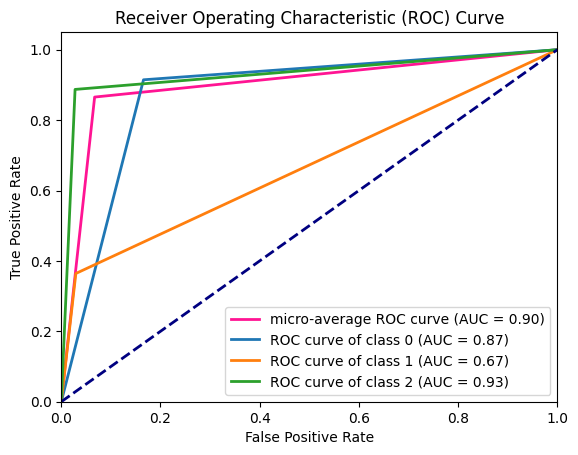

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

actual_labels = nb_test_y 
predicted_labels = prediction

n_classes = 3

binarized_labels = label_binarize(actual_labels, classes=np.unique(actual_labels))

predicted_labels_2d = np.zeros((len(predicted_labels), n_classes))
predicted_labels_2d[np.arange(len(predicted_labels)), predicted_labels] = 1

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], predicted_labels_2d[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(binarized_labels.ravel(), predicted_labels_2d.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

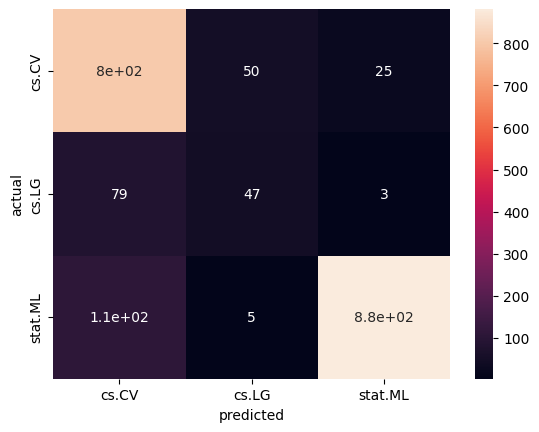

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    confusion_mat = np.zeros((3, 3), dtype=int)

    for true, pred in zip(y_true, y_pred):
        confusion_mat[true, pred] += 1

    sns.heatmap(confusion_mat, annot=True, xticklabels=classes, yticklabels=classes)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

plot_confusion_matrix(nb_test_y, prediction, distinct_labels)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [5]:
import nltk
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_fscore_support,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from nltk import word_tokenize
from tqdm import tqdm
import torch
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer,
)

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [17]:
# read data
df = pd.read_csv('./arxiv_data.csv')
df = df.drop_duplicates(subset=['summaries', 'titles'])
df = df.head(NB_DATA_SIZE)

In [18]:
# perform data cleaning and eda (you can add cells here)
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 0 to 25643
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     21000 non-null  object
 1   summaries  21000 non-null  object
 2   terms      21000 non-null  object
dtypes: object(3)
memory usage: 656.2+ KB


In [20]:
df.describe()

,titles,summaries,terms
count,21000,21000,21000
unique,20992,20998,1829
top,Class-Agnostic Segmentation Loss and Its Appli...,Feature learning forms the cornerstone for tac...,['cs.CV']
freq,2,2,7681


In [21]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    tokens = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        tokens = [word for word in tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        tokens = [word for word in tokens if word not in string.punctuation]

    if lower_case:
        tokens = [word.lower() for word in tokens if len(word) > minimum_length]
    else:
        tokens = [word for word in tokens if len(word) > minimum_length]

    return tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [22]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
df['text'] = df['preprocessed_abstract'] + df['preprocessed_title']
df['label'] = [extract_label_from_labels(labels) for labels in df['terms']]
df['text'] = df['text'].apply(lambda x: " ".join(x))

In [23]:
distinct_labels = ['cs.CV' , 'cs.LG', 'stat.ML']

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [ ]:
with open('./df.txt', 'w') as fp:
    for text in df['text']:
        fp.write("%s\n" % text)

In [ ]:
import fasttext

class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        self.model = fasttext.train_unsupervised(texts, model=self.method, dim=100, epoch=20)

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        if tf_idf_vectorizer is not None:
            query_tokens = tf_idf_vectorizer.transform([query]).nonzero()[1]
            feature_names = np.array(tf_idf_vectorizer.get_feature_names_out())
            word_vectors = [self.model.get_word_vector(feature_names[token]) for token in query_tokens]
            if word_vectors:
                query_embedding = np.mean(word_vectors, axis=0)
            else:
                query_embedding = np.zeros(self.model.get_dimension()) 

            return query_embedding
        
        query_embed = self.model.get_sentence_vector(query)

        return query_embed

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [ ]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare('df.txt', mode='train', save=True)
# FastText_model.prepare(preprocessed_total, mode='load')

Read 2M words
Number of words:  17332
Number of labels: 0
Progress: 100.0% words/sec/thread:   43404 lr:  0.000000 avg.loss:  2.161865 ETA:   0h 0m 0s


In [ ]:
text = 'covid'
FastText_model.model.get_nearest_neighbors(text)

[(0.8217171430587769, 'covid-19'),
 (0.790477454662323, 'covid19'),
 (0.7554100751876831, 'dr-covid'),
 (0.6970248222351074, 'pandemic'),
 (0.6372684240341187, 'infections'),
 (0.6164882779121399, 'infection'),
 (0.6153948903083801, 'sars-cov-2'),
 (0.5874530076980591, 'cxrs'),
 (0.5803035497665405, 'coronavirus'),
 (0.5779264569282532, 'infected')]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

class TF_IDF:
    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit(data)

In [ ]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(df['text'])

In [ ]:
text =  "backpropagation is good"
TF_IDF_model.vectorizer.transform([' '.join(text)])
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([-9.43109170e-02, -1.74003527e-01, -2.60230064e-01, -1.07417858e+00,
       -3.95305902e-01,  1.17544197e-01,  2.12591648e-01,  7.42270574e-02,
        3.75362545e-01,  1.68277964e-01, -3.92450809e-01,  1.44817322e-01,
        6.41919434e-01, -3.05010110e-01, -7.41053596e-02,  3.50975990e-02,
        4.85064983e-02, -5.54283299e-02, -2.16050223e-01, -2.57802308e-01,
        1.48469418e-01, -1.41406596e-01, -1.61056861e-01,  5.28119922e-01,
        3.37071158e-02, -3.65728766e-01, -8.28735977e-02, -6.83000833e-02,
       -3.41563314e-01,  3.55613142e-01,  2.79051717e-02,  6.31969869e-01,
        3.97448540e-02, -3.03980619e-01, -1.19144619e-01,  1.93950355e-01,
        6.69081390e-01, -3.81733507e-01, -2.90603966e-01,  5.48799694e-01,
       -4.07221943e-01,  3.64338398e-01,  2.11724922e-01,  3.85873407e-01,
        4.41608280e-01,  2.15841338e-01,  1.75843909e-01,  1.60996214e-01,
       -4.17928100e-01, -1.06553035e-02,  3.31713445e-02, -1.47726834e-01,
       -3.45563889e-01, -


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [ ]:
embeddings = []
for paper in df['text']:
    embedding = FastText_model.get_query_embedding(paper, TF_IDF_model.vectorizer)
    embeddings.append(embedding)

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [ ]:
from torch.utils.data import Dataset, DataLoader
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = embeddings
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, i):
        return self.embeddings[i], self.labels[i]

In [ ]:
from torch.utils.data import random_split

BATCH_SIZE = 128
labels_str, labels = np.unique(df['label'], return_inverse=True)
dataset = PapersDataSet(embeddings, labels)
train_dataset, val_dataset, test_dataset = random_split(dataset, [0.8, 0.1 , 0.1])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [ ]:
from torch import nn
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super().__init__()
        self.num_classes = num_classes
        self.in_features = in_features
        
        self.fc1 = nn.Linear(self.in_features, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.act1 = nn.GELU()
        self.fc2 = nn.Linear(32, self.num_classes)

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.act1(out)
        out = self.fc2(out)
        return out

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [ ]:
# todo define the loss function and the optimizer. We suggest using Adam optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)

In [ ]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """

    
    total_loss = 0.0
    predicted_labels, actual_labels = [], []
    model.eval()

    with torch.no_grad():
        for x, labels in dataloader:
            x, labels= x.to(device), labels.to(device)

            model_out = model(x)
            loss = criterion(model_out, labels) * len(labels)
            total_loss += loss.item()
            preds = torch.argmax(model_out, axis=1)
            predicted_labels.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

    total_loss /= len(dataloader.dataset)

    f1_score_macro = f1_score(predicted_labels, actual_labels, average='macro')
    print(f"Loss: {round(total_loss, 4)} - f1 macro: {round(f1_score_macro, 4)} on {'test' if test_mode else 'validation'} set")
    return total_loss, predicted_labels, actual_labels, f1_score_macro

In [ ]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
EPOCHS = 60
train_losses, validation_losses, train_f1_macros, val_f1_macros = [], [], [], []
for epoch in range(EPOCHS):
    train_loss, val_loss, correct_predicted = 0, 0, 0
    predicted_labels_train, true_labels_train = [], []

    model.train()
    for i , (x, label) in enumerate(train_loader):
        x, label = x.to(device), label.to(device)

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, label) * len(label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, 1)
        correct_predicted += (preds == label).sum().item()

        predicted_labels_train.extend(preds.cpu().numpy())
        true_labels_train.extend(label.cpu().numpy())
      
    train_loss /= len(train_dataset)    
    model.eval()
    train_f1 = f1_score(true_labels_train, predicted_labels_train, average='macro')

    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    lr_scheduler.step(val_loss)

    train_losses.append(train_loss)
    validation_losses.append(val_loss)
    train_f1_macros.append(train_f1)
    val_f1_macros.append(f1_score_macro)
    print(f'Epoch {epoch + 1} - Train Loss = {round(train_loss, 4)}')

Loss: 0.6398 - f1 macro: 0.557 on validation set
Epoch 1 - Train Loss = 0.7848
Loss: 0.5205 - f1 macro: 0.5664 on validation set
Epoch 2 - Train Loss = 0.5637
Loss: 0.4556 - f1 macro: 0.5737 on validation set
Epoch 3 - Train Loss = 0.4802
Loss: 0.4306 - f1 macro: 0.5772 on validation set
Epoch 4 - Train Loss = 0.4358
Loss: 0.4068 - f1 macro: 0.5784 on validation set
Epoch 5 - Train Loss = 0.4086
Loss: 0.3947 - f1 macro: 0.5804 on validation set
Epoch 6 - Train Loss = 0.3904
Loss: 0.3881 - f1 macro: 0.5814 on validation set
Epoch 7 - Train Loss = 0.3787
Loss: 0.3806 - f1 macro: 0.5799 on validation set
Epoch 8 - Train Loss = 0.3696
Loss: 0.3751 - f1 macro: 0.5798 on validation set
Epoch 9 - Train Loss = 0.3614
Loss: 0.3717 - f1 macro: 0.593 on validation set
Epoch 10 - Train Loss = 0.3567
Loss: 0.3702 - f1 macro: 0.5927 on validation set
Epoch 11 - Train Loss = 0.351
Loss: 0.3693 - f1 macro: 0.5948 on validation set
Epoch 12 - Train Loss = 0.3479
Loss: 0.3655 - f1 macro: 0.6047 on valid

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

In [ ]:
import matplotlib.pyplot as plt

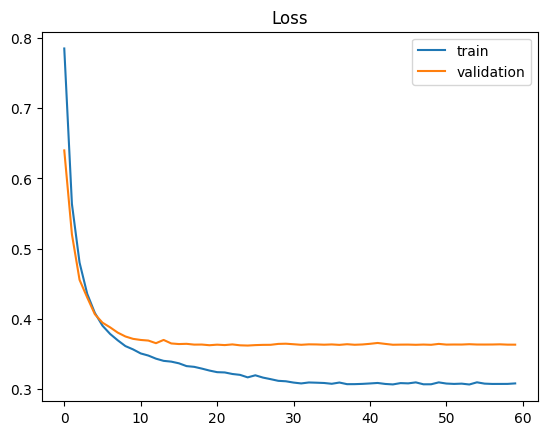

In [ ]:
plt.plot(train_losses)
plt.plot(validation_losses)
plt.title('Loss')
plt.legend(['train', 'validation'])
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

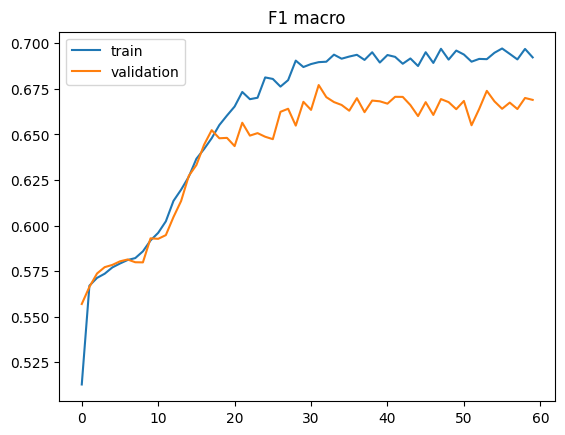

In [ ]:
plt.plot(train_f1_macros)
plt.plot(val_f1_macros)
plt.title('F1 macro')
plt.legend(['train', 'validation'])

plt.show()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score

model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)

print("Accuracy: " + str(accuracy_score(true_labels, predicted_labels)))
print("F1 macro: " + str(f1_score(true_labels, predicted_labels, average='macro')))
print("F1 micro: " + str(f1_score(true_labels, predicted_labels, average='micro')))
print("Precision macro: " + str(precision_score(true_labels, predicted_labels, average='macro')))
print("Precision micro: " + str(precision_score(true_labels, predicted_labels, average='micro')))
print("Recall macro: " + str(recall_score(true_labels, predicted_labels, average='macro')))
print("Recall micro: " + str(recall_score(true_labels, predicted_labels, average='micro')))

Loss: 0.3579 - f1 macro: 0.6783 on test set
Accuracy: 0.8714285714285714
F1 macro: 0.6782598825513707
F1 micro: 0.8714285714285714
Precision macro: 0.7784529866214434
Precision micro: 0.8714285714285714
Recall macro: 0.658719612315015
Recall micro: 0.8714285714285714


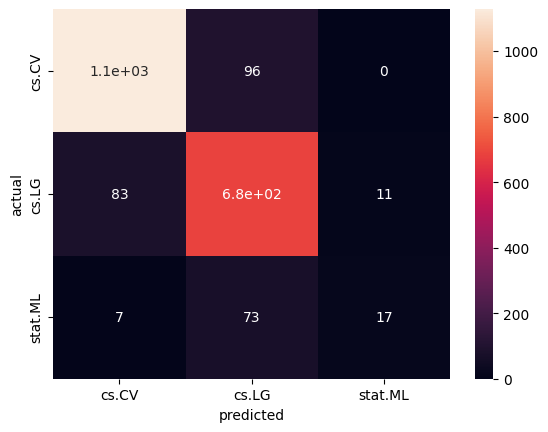

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#TODO confusion matrix without importing confusion_matrix from sklearn.metrics

def plot_confusion_matrix(y_true, y_pred, classes):
    confusion_mat = np.zeros((3, 3), dtype=int)

    for true, pred in zip(y_true, y_pred):
        confusion_mat[true, pred] += 1

    sns.heatmap(confusion_mat, annot=True, xticklabels=classes, yticklabels=classes)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

plot_confusion_matrix(true_labels, predicted_labels, distinct_labels)

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the que|ry
    :return: the class of the query in the form of real strings.
    """
    embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    embedding = torch.tensor(embedding).view(1, -1).to(device)
    model.eval()
    output = model(embedding)
    _ , predicted_class = torch.max(output.data, 1)
    return labels_str[predicted_class]

In [ ]:
predict('hardware and computerc architecture is good')

'cs.CV'

In [ ]:
PATH = "nn_fasttext_model.pt"
# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [3]:
import nltk
import string
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_fscore_support,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from nltk import word_tokenize
from tqdm import tqdm
import torch
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer,
)
import random

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [8]:
# read data

df = pd.read_csv('./arxiv_data.csv')
df = df.drop_duplicates(subset=['titles', 'summaries'])
labels_str = [extract_label_from_labels(labels) for labels in df['terms']]
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels_str)

In [5]:
# perform data cleaning and eda (you can add cells here)
# todo
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [15]:
df.isnull().sum()

titles       0
summaries    0
terms        0
dtype: int64

In [16]:
df.describe()

,titles,summaries,terms
count,20000,20000,20000
unique,19993,19998,1758
top,Class-Agnostic Segmentation Loss and Its Appli...,Transformer is a powerful tool for many natura...,['cs.CV']
freq,2,2,7272


In [17]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    tokens = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        tokens = [word for word in tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        tokens = [word for word in tokens if word not in string.punctuation]

    if lower_case:
        tokens = [word.lower() for word in tokens if len(word) > minimum_length]
    else:
        tokens = [word for word in tokens if len(word) > minimum_length]

    return tokens

In [60]:
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
df['text'] = df['preprocessed_abstract'] + df['preprocessed_title']
df['label'] = labels_str[:20000]
df['text'] = df['text'].apply(lambda x: " ".join(x))
df

,titles,summaries,terms,preprocessed_abstract,preprocessed_title,text,label
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']","[stereo, matching, one, widely, used, techniqu...","[survey, semantic, stereo, matching, semantic,...",stereo matching one widely used techniques inf...,cs.CV
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']","[recent, advancements, artificial, intelligenc...","[future-ai, guiding, principles, consensus, re...",recent advancements artificial intelligence ai...,cs.CV
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']","[paper, proposed, novel, mutual, consistency, ...","[enforcing, mutual, consistency, hard, regions...",paper proposed novel mutual consistency networ...,cs.CV
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV'],"[consistency, training, proven, advanced, semi...","[parameter, decoupling, strategy, semi-supervi...",consistency training proven advanced semi-supe...,cs.CV
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']","[ensure, safety, automated, driving, correct, ...","[background-foreground, segmentation, interior...",ensure safety automated driving correct percep...,cs.CV
...,...,...,...,...,...,...,...
24266,qDKT: Question-centric Deep Knowledge Tracing,"Knowledge tracing (KT) models, e.g., the deep ...","['cs.LG', 'cs.AI', 'stat.ML']","[knowledge, tracing, kt, models, e.g., deep, k...","[qdkt, question-centric, deep, knowledge, trac...",knowledge tracing kt models e.g. deep knowledg...,cs.LG
24267,NENET: An Edge Learnable Network for Link Pred...,Text detection in scenes based on deep neural ...,"['cs.LG', 'cs.CL', 'cs.CV']","[text, detection, scenes, based, deep, neural,...","[nenet, edge, learnable, network, link, predic...",text detection scenes based deep neural networ...,cs.LG
24268,Structural Temporal Graph Neural Networks for ...,Detecting anomalies in dynamic graphs is a vit...,"['cs.LG', 'cs.SI', 'stat.ML']","[detecting, anomalies, dynamic, graphs, vital,...","[structural, temporal, graph, neural, networks...",detecting anomalies dynamic graphs vital task ...,cs.LG
24269,Understanding Graph Isomorphism Network for rs...,Graph neural networks (GNN) rely on graph oper...,"['cs.CV', 'cs.LG', 'stat.ML']","[graph, neural, networks, gnn, rely, graph, op...","[understanding, graph, isomorphism, network, r...",graph neural networks gnn rely graph operation...,cs.CV


In [10]:
distinct_labels =  ['cs.CV' , 'cs.LG', 'stat.ML']

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [11]:
# todo
# calculate labels
# calulcate final texts
# select 10000 data randomly
# split data into train and test


X, y = list(zip(*random.sample(list(zip( df['text'], labels)), 10000)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [13]:
bert_model = BertForSequenceClassification.from_pretrained("./drive/MyDrive/bert_model/", num_labels=3).to(device)
bert_freeze_model = BertForSequenceClassification.from_pretrained("./drive/MyDrive/bert_freeze_model/", num_labels=3).to(device)
for param in bert_freeze_model.bert.parameters():
    param.requires_grad = False

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

In [14]:
# todo
class BertDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels, tokenizer):
        self.tokenizer = tokenizer
        self.encoded_data = self.tokenizer(data, truncation=True, padding=True, max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encoded_data.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = BertDataset(X_train, y_train, tokenizer)
test_dataset = BertDataset(X_test, y_test, tokenizer)

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    f1_score_macro = f1_score(labels, preds, average='macro')
    f1_score_micro = f1_score(labels, preds, average='micro')
    precision_macro = precision_score(labels, preds, average='macro')
    precision_micro = precision_score(labels, preds, average='micro')
    recall_macro = recall_score(labels, preds, average='macro')
    recall_micro = recall_score(labels, preds, average='micro')    

    return {
      'accuracy': acc,
      'f1 macro': f1_score_macro,
      'f1 micro': f1_score_micro,
      'precision macro': precision_macro,
      'precisoin micro': precision_micro,
      'recall macro': recall_macro,
      'recall micro': recall_micro,
    }

In [ ]:
# fine tune bert and train model
training_args = TrainingArguments(
    output_dir='./bert_model',         
    num_train_epochs=3,           
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    weight_decay=0.01,
    learning_rate=2e-4,
    load_best_model_at_end=True,    
    evaluation_strategy="steps",
)

trainer = Trainer(
    model=bert_model,                       
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1 macro,F1 micro,Precision macro,Precisoin micro,Recall macro,Recall micro
400,0.451400,0.384941,0.863500,0.592931,0.863500,0.571137,0.863500,0.616574,0.863500
800,0.321400,0.364486,0.872000,0.653407,0.872000,0.790684,0.872000,0.649466,0.872000
1200,0.238600,0.388905,0.862000,0.702312,0.862000,0.721838,0.862000,0.691719,0.862000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1200, training_loss=0.3371373685201009, metrics={'train_runtime': 1499.825, 'train_samples_per_second': 16.002, 'train_steps_per_second': 0.8, 'total_flos': 4267370743776000.0, 'train_loss': 0.3371373685201009, 'epoch': 3.0})

In [ ]:
# freeze bert weights and then train model_2
training_args_freeze = TrainingArguments(
    output_dir='./bert_freeze_model/',         
    num_train_epochs=3,           
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    weight_decay=0.01,
    learning_rate=2e-4,
    load_best_model_at_end=True,
    evaluation_strategy="steps",
)

trainer_freeze = Trainer(
    model=bert_freeze_model,                       
    args=training_args_freeze,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer_freeze.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1 macro,F1 micro,Precision macro,Precisoin micro,Recall macro,Recall micro
400,0.936300,0.869468,0.511000,0.225458,0.511000,0.170333,0.511000,0.333333,0.511000
800,0.867800,0.848388,0.526000,0.252458,0.526000,0.429379,0.526000,0.345175,0.526000
1200,0.858500,0.842493,0.550000,0.291353,0.550000,0.441738,0.550000,0.364135,0.550000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1200, training_loss=0.887521235148112, metrics={'train_runtime': 756.6906, 'train_samples_per_second': 31.717, 'train_steps_per_second': 1.586, 'total_flos': 5254046060256000.0, 'train_loss': 0.887521235148112, 'epoch': 3.0})

In [ ]:
trainer_freeze.save_model('./drive/MyDrive/bert_freeze_model')

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

The evaluations on the testset can be found in the cells which the models were trained. (the last row)

In [18]:
# you can add more cells here if you need
# todo
y_pred_transformers_1 = [np.argmax(prediction, axis=0) for prediction in trainer.predict(test_dataset)[0]]
y_pred_transformers_2 = [np.argmax(prediction, axis=0) for prediction in trainer_freeze.predict(test_dataset)[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


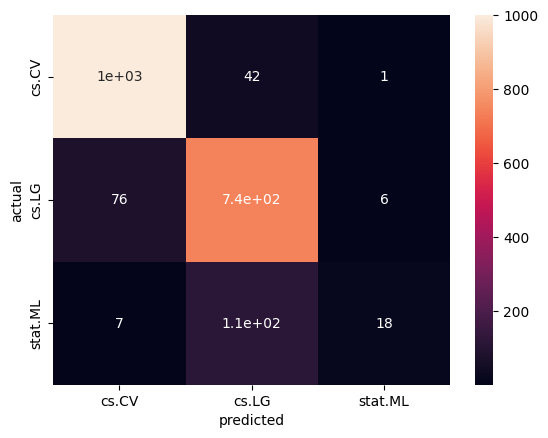

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#TODO confusion matrix without importing confusion_matrix from sklearn.metrics

def plot_confusion_matrix(y_true, y_pred, classes):
    confusion_mat = np.zeros((3, 3), dtype=int)

    for true, pred in zip(y_true, y_pred):
        confusion_mat[true, pred] += 1

    sns.heatmap(confusion_mat, annot=True, xticklabels=classes, yticklabels=classes)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_transformers_1, distinct_labels)

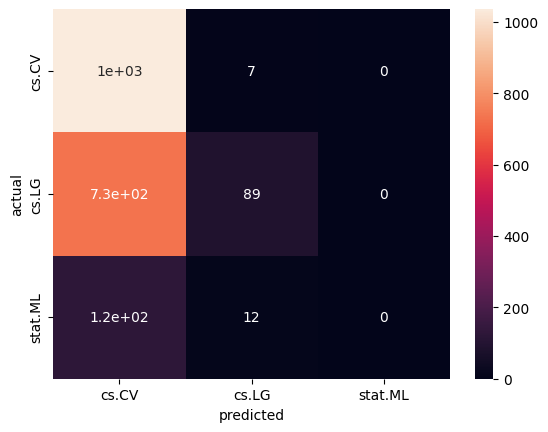

In [20]:
plot_confusion_matrix(y_test, y_pred_transformers_2, distinct_labels)

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
پاسخ خود را در این قسمت بنویسید
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [24]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    encoded_input = tokenizer(x, padding=True, truncation=True, max_length=512, return_tensors='pt')
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)
    output = model(input_ids, attention_mask)
    _, prediction = torch.max(output[0], dim=1)

    return list(label_encoder.inverse_transform(prediction.to('cpu').numpy()))[0]

In [25]:
predict('hardware is very good.', trainer.model)

'cs.LG'

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [17]:
from collections import defaultdict

In [40]:
labels = [extract_label_from_labels(labels) for labels in df['terms']]
corpus = []
for i, (index, row) in enumerate(df.iterrows()):
    titles, summaries, label = row['titles'], row['summaries'], labels[i]
    title_token = preprocess_text(titles)
    summaries_token = preprocess_text(summaries)
    corpus.append({'title':title_token, 'summaries':summaries_token, 'label':label})

In [41]:
title_lengths = defaultdict(int)
summaries_lengths = defaultdict(int)
for paper_id, data in enumerate(corpus):
    title_tokens, summaries_tokens = data['title'], data['summaries']
    title_lengths[paper_id] = len(title_tokens)
    summaries_lengths[paper_id] = len(summaries_tokens)

In [45]:
from collections import defaultdict
def construct_positional_indexes(corpus):
    positional_index = defaultdict(lambda: defaultdict(lambda: {'title': [], 'summaries': [], 'label': None}))
    for paper_id, data in enumerate(corpus):
        title, summaries, label = data['title'], data['summaries'], data['label']
        for position, token in enumerate(title):
            positional_index[token][paper_id]['title'].append(position)
            positional_index[token][paper_id]['label'] = label
        for position, token in enumerate(summaries):
            positional_index[token][paper_id]['summaries'].append(position)
            positional_index[token][paper_id]['label'] = label

            
    return positional_index
positional_index = construct_positional_indexes(corpus)

In [43]:
import math

number_of_documents = len(corpus)
def get_idf(token, prob=False):
    df = len(positional_index[token])
    if prob:
        return max(0, math.log10((number_of_documents - df) / (df + 1)))
    else:
        return math.log10(number_of_documents / (df + 1))

def get_logarithmic_tf(tf_raw):
    if tf_raw == 0:
        return 0
    else:
        return 1 + math.log10(tf_raw)

In [54]:
def get_doc_scores(tf_query, method, field='title', category='all'):
    doc_scores = defaultdict(int)
    norm_factors = defaultdict(int)

    doc_lengths = title_lengths if field == 'title' else summaries_lengths
    average_doc_length = sum([v for v in doc_lengths.values()]) / len(doc_lengths)
    for token, tf_query_raw in tf_query.items():
        if token not in positional_index:
            continue
        for doc_id, positions in positional_index[token].items():
            label = positions['label']
            if category != 'all' and category != label:
                continue
            if len(positions[field]) == 0:
                continue
            if method == 'ltn-lnn':
                tf_doc_raw = len(positions.get(field, []))
                tf_doc = get_logarithmic_tf(tf_doc_raw)
                idf = get_idf(token)
                doc_coeff = idf * tf_doc
                
                tf_query = get_logarithmic_tf(tf_query_raw)
                doc_scores[doc_id] += tf_query * doc_coeff
                
            if method == 'ltc-lnc':
                tf_doc_raw = len(positions.get(field, []))
                tf_doc = get_logarithmic_tf(tf_doc_raw)
                idf = get_idf(token)
                doc_coeff = idf * tf_doc
                tf_query = get_logarithmic_tf(tf_query_raw)

                doc_scores[doc_id] += tf_query * doc_coeff
                norm_factors[doc_id] += doc_coeff ** 2
            if method == 'okapi25':
                k1 = 1.5
                b = 0.75
                tf_token_doc = len(positions.get(field, []))
                doc_scores[doc_id] += get_idf(token) * (k1 + 1) * tf_token_doc / (k1 * (1 - b + b * doc_lengths[doc_id] / average_doc_length) + tf_token_doc)
    
    if method == 'ltc-lnc':
        for doc_id in doc_scores:
            doc_scores[doc_id] /= math.sqrt(norm_factors[doc_id])
    
    return doc_scores

In [56]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def print_result(doc_ids, title_query, abstract_query):
    corrected_title_query = preprocess_text(title_query)
    abstract_query = preprocess_text(abstract_query)

    print('________________________________')
    for doc_id in doc_ids:
        title_content = df.iloc[doc_id]['titles']
        abstract_content = df.iloc[doc_id]['summaries']
        label = extract_label_from_labels(df.iloc[doc_id]['terms'])
        print(f"Paper Id: {doc_id}")
        print(f"Label: {label}")

        print(f'Title Snippet: {title_content}')
        print(f'Abstract Snippet: {abstract_content}')
        print('________________________________')



In [63]:
import collections

from typing import List, Tuple

def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn',\
           weight: float = 0.5, print=False, category = 'all'):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word apears on.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        category: 'all' for searching in all documents. 
                  'category_name' for searching in a specific category with category_name label.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retreived documents with snippet
    """
    # TODO: retun top 'max_result_count' documents for your searched query
    tf_query_title = defaultdict(int)
    tf_query_abstract = defaultdict(int)
    
    tokens_title = preprocess_text(title_query) if title_query else []
    tokens_abstract = preprocess_text(abstract_query) if abstract_query else []
    query_tokens = tokens_title + tokens_abstract

    scores = collections.defaultdict(list)
    for token in tokens_title:
        tf_query_title[token] += 1
            
    for token in tokens_abstract:
        tf_query_abstract[token] += 1
    
    title_query_doc_scores = get_doc_scores(tf_query_title, method, 'title', category)
    abstract_query_doc_scores = get_doc_scores(tf_query_abstract, method, 'summaries', category)
    
    total_doc_ids = list(set(list(title_query_doc_scores.keys()) + list(abstract_query_doc_scores.keys())))
    doc_scores = collections.defaultdict(int)
    
    for doc_id in total_doc_ids:
        title_score = title_query_doc_scores.get(doc_id, 0) if category != 'summaries' else 0
        abstract_score = abstract_query_doc_scores.get(doc_id, 0) if category != 'title' else 0
        
        doc_scores[doc_id] = weight * title_score + (1 - weight) * abstract_score
        
    sorted_doc_ids = [key for key, value in sorted(doc_scores.items(), key=lambda item: item[1], reverse=True)]
    applicable_doc_ids = sorted_doc_ids[:max_result_count]
    if print:
        print_result(applicable_doc_ids, title_query, abstract_query)
    return applicable_doc_ids


results = search(
    'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
    'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
    10,
    method='ltc-lnc',
    print=True,
    category='all'
)
# TODO: retun top 'max_result_count' documents for your searched query

________________________________
Paper Id: 0
Label: cs.CV
Title Snippet: Survey on Semantic Stereo Matching / Semantic Depth Estimation
Abstract Snippet: Stereo matching is one of the widely used techniques for inferring depth from
stereo images owing to its robustness and speed. It has become one of the major
topics of research since it finds its applications in autonomous driving,
robotic navigation, 3D reconstruction, and many other fields. Finding pixel
correspondences in non-textured, occluded and reflective areas is the major
challenge in stereo matching. Recent developments have shown that semantic cues
from image segmentation can be used to improve the results of stereo matching.
Many deep neural network architectures have been proposed to leverage the
advantages of semantic segmentation in stereo matching. This paper aims to give
a comparison among the state of art networks both in terms of accuracy and in
terms of speed which are of higher importance in real-time applications

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [51]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
import scipy.cluster.hierarchy as shc
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, BertTokenizerFast, BertModel
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

In [12]:
df = df.head(20000)
label = labels[:20000]

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained('bert-base-uncased').to(device)

cuda


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
from typing import List

def extract_embedding(doc_list : List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """
    embeddings = []
    with torch.no_grad():
        for doc in doc_list:
            inputs = tokenizer(doc, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
            h = bert(**inputs, output_hidden_states=True).hidden_states[-1][0,0,:]
            embeddings.append(h.detach().cpu().numpy())

        return np.array(embeddings)

df_embedding = extract_embedding(df['text'])

In [24]:
import pickle

with open('docs_embedding.pkl', 'rb') as f:
      df_embedding = pickle.load(f)

df_embedding.shape

(20000, 768)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [27]:
## ؟ points

from typing import List
from sklearn.manifold import TSNE

def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """
    return TSNE(n_components=2).fit_transform(emb_vecs)

df_2d = convert_to_2d_tsne(df_embedding) # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



In [34]:
## ؟ points
import matplotlib.pyplot as plt
from typing import List

def plot_docs(emb_vecs_2d: List, labels : List, title):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """
    plt.scatter(emb_vecs_2d[:, 0], emb_vecs_2d[:, 1], c=labels, alpha=0.4)
    plt.title(title)
    plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

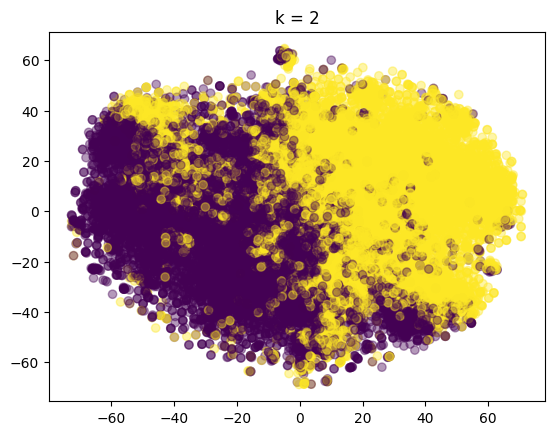

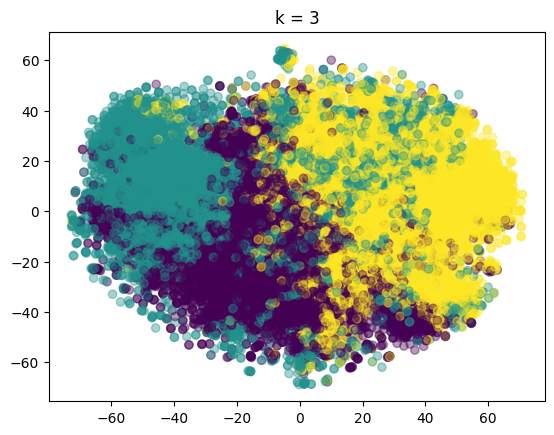

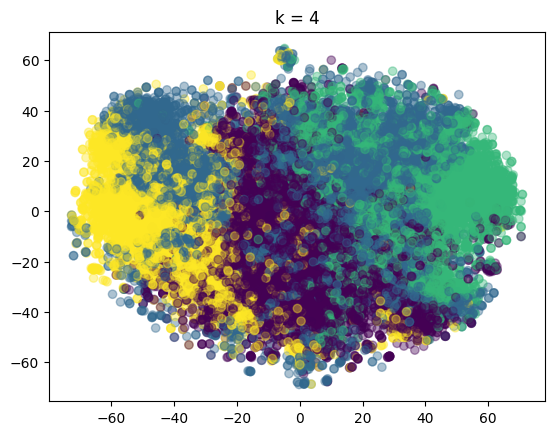

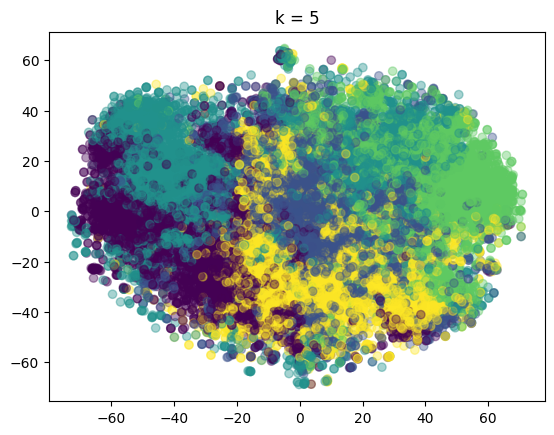

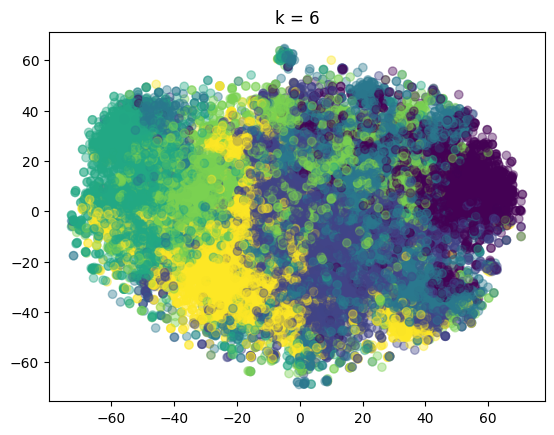

In [36]:
## ؟ points

from typing import List

def cluster_kmeans(emb_vecs : List, n_clusters : int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """
    
    total_cnt = len(emb_vecs)
    rand_indices = np.random.choice(total_cnt, n_clusters, replace=False)
    
    cluster_centers = np.array(emb_vecs)[rand_indices]
    cluster_labels = -1 * np.ones(total_cnt, dtype=int) 
    n_iters = 20
    for _ in range(n_iters):
        # calculate samples label
        for i in range(total_cnt):
            to_center_dists = [np.linalg.norm(emb_vecs[i] - cluster_centers[j]) for j in range(n_clusters)]
            cluster_labels[i] = np.argmin(to_center_dists)
        
        # recalculate cluster centers position
        for i in range(n_clusters):
            cluster_centers[i] = np.mean([emb_vecs[j] for j in range(total_cnt) if cluster_labels[j] == i], axis=0)

    return cluster_centers.tolist(), cluster_labels.tolist()

cluster_centers, cluster_labels = [], []


k_s = list(range(2, 7))
for k in k_s:
    clusters_centers, clusters_labels = cluster_kmeans(df_embedding, k)
    cluster_centers.append(clusters_centers)
    cluster_labels.append(clusters_labels)
    plot_docs(df_2d, clusters_labels, f'k = {k}')

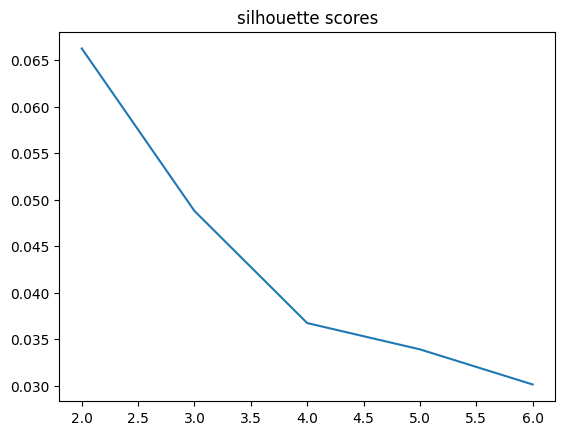

In [37]:
#TODO: silhouette analysis 
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
for i in range(len(k_s)):
    silhouette_scores.append(silhouette_score(df_embedding, cluster_labels[i]))
    
plt.plot(k_s, silhouette_scores)

plt.title('silhouette scores')
plt.show()

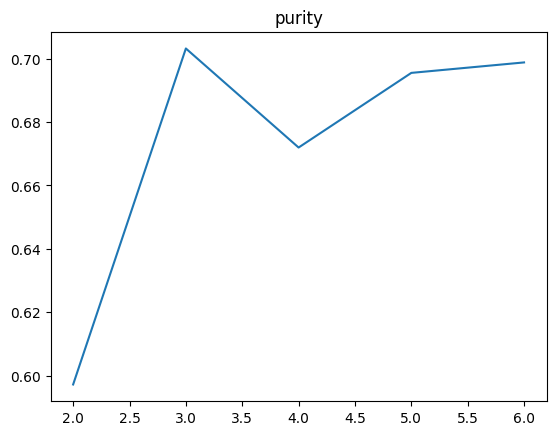

In [50]:
#TODO: plot purity for different value of k
purities = []
for i in range(len(k_s)):
    conf_mat = confusion_matrix(label, cluster_labels[i])
    purities.append(np.sum(np.amax(conf_mat, axis=0)) / np.sum(conf_mat))
plt.plot(k_s, purities)
plt.title('purity')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

In [52]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

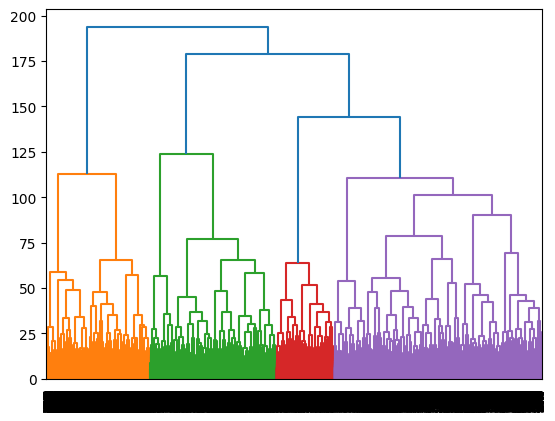

In [53]:
Z = shc.linkage(df_embedding, 'ward')
dn = shc.dendrogram(Z)
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

In [72]:
title_query = 'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
summaries_query = 'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
doc_ids = search(
    'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
    'Survey on Semantic Stereo Matching / Semantic Depth Estimation',
    10,
    method='ltc-lnc',
    category='all',
)

kmeans_clusters_center = cluster_centers[0]
embeddings = df_embedding[np.array(doc_ids)]
current_predicted_labels = []
for i, emb in enumerate(embeddings):
    to_center_dists = [np.linalg.norm(emb - kmeans_clusters_center[j]) for j in range(len(kmeans_clusters_center))]
    current_predicted_labels[i] = np.argmin(to_center_dists)

for paper_id, current_predicted_label in zip(doc_ids, current_predicted_labels):
    print(f'Paper Id = {paper_id}, Predicted Cluster = {current_predicted_label}')

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [55]:
## ؟ points

from typing import List

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    input_doc = emb_vecs[input_doc_index]
    docs_similarity = [np.dot(input_doc, doc) for doc in emb_vecs]
    return np.argsort(docs_similarity)[1:num_of_similar_docs + 1]
